```
/**
 * newField: The new field name.
 * expression: The new field expression.
 */
{
  user_rating: {
    $convert: {
      input: "$user_rating",
      to: "double",
      onError: null,
    },
  },
  runtime: {
    $convert: {
      input: "$runtime",
      to: "int",
      onError: null,
    },
  },
  votes: {
    $convert: {
      input: "$votes",
      to: "int",
      onError: null,
    },
  },
  budget: {
    $convert: {
      input: "$budget",
      to: "int",
      onError: null,
    },
  },
  opening_weekend: {
    $convert: {
      input: "$opening_weekend",
      to: "int",
      onError: null,
    },
  },
  gross_sales: {
    $convert: {
      input: "$gross_sales",
      to: "int",
      onError: null,
    },
  },
  genres: {
      $split: [{
        $toString: '$genres',
      }, ', ']
    },
  cast: {
      $split: [{
        $toString: '$cast',
      }, ', ']
    },
  director: {
      $split: [{
        $toString: '$director',
      }, ',']
    },
  producer: {
      $split: [{
        $toString: '$producer',
      }, ', ']
    },
  company: {
      $split: [{
        $toString: '$company',
      }, ', ']
    },
  release_date: {
    $convert: {
      input: "$release_date",
      to: "date",
      onError: null,
    },
  },
  mpaa_rating: {
    $map: {
      input: {
        $split: ["$mpaa_rating", "::"],
      },
      as: "rating_split",
      in: {
        $trim: {
          input: "$$rating_split",
        },
      },
    },
  },
  new_rating: {
    $arrayElemAt: [
      {
        $split: ["$mpaa_rating", "::"],
      },
      0,
    ],
  },
}
```

In [1]:
# import json to read the credentials.json file
import json

# open the credentials.json file and load the data into a variable called credentials
with open(r'C:\Users\kater\OneDrive\Desktop\MongoDB_SuperheroMovies\Credentials.json') as f:
    credentials = json.load(f)
    mongo_connection_string=credentials['mongodb']

# print the connection string character length
print(f"My MongoDB connection string is {len(mongo_connection_string)} characters long.")

My MongoDB connection string is 69 characters long.


In [2]:
# pymongo is the package that allows us to connect to MongoDB
import pymongo
# MongoClient is the class that allows us to connect to MongoDB
from pymongo import MongoClient
# certifi is a package that contains a cacert.pem file that has valid certificates for AWS
import certifi

# connect to the MongoDB database server using the MongoClient class
client = MongoClient(mongo_connection_string)
db = client.moviedata

# use certifi to set the SSL certificate, which is required by MongoDB Atlas, and connect to the database, which is called moviedata
mongo_connection_string = credentials['mongodb']
client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())

# name of the MongoDB database we want to access
database = client['moviedata']

# name of the MongoDB collections we want to access
allCollections = database.list_collection_names()

# print the collections in the database
print(f"This database has the collections {allCollections}")

This database has the collections ['metacritic', 'superhero', 'IMDB_View_Pipeline']


In [3]:
# pandas is a package that allows us to work with data as dataframes
import pandas as pd
# re is a package that allows us to use regular expressions
import re

# Retrieve all records from a collection - this can be a large amount of data!
cursor = database["IMDB_View_Pipeline"].find()

# Create a dataframe from the MongoDB records
df = pd.DataFrame(cursor)

print(df.columns)
print("  ")
print(df.dtypes)
print("  ")
print(df.shape)

# print the first 5 rows of the dataframe
df.head()

Index(['_id', 'id', 'title', 'runtime', 'user_rating', 'votes', 'mpaa_rating',
       'release_date', 'budget', 'opening_weekend', 'gross_sales', 'genres',
       'cast', 'director', 'producer', 'company', 'new_rating'],
      dtype='object')
  
_id                        object
id                          int64
title                      object
runtime                   float64
user_rating               float64
votes                       int64
mpaa_rating                object
release_date       datetime64[ns]
budget                    float64
opening_weekend           float64
gross_sales               float64
genres                     object
cast                       object
director                   object
producer                   object
company                    object
new_rating                 object
dtype: object
  
(29443, 17)


,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company,new_rating
0,6529a49d25a901e01e925d73,77631,Grease,110.0,7.2,265183,"[TV-14, (D)]",1978-06-13,6000000.0,60759.0,394955690.0,"[Comedy, Musical, Romance]","[John Travolta, Olivia Newton-John, Stockard C...",[Randal Kleiser],"[Allan Carr, Neil A. Machlis, Robert Stigwood]","[Paramount Pictures, Robert Stigwood Organizat...",TV-14
1,6529a49d25a901e01e925d82,77523,Every Which Way but Loose,114.0,6.3,27296,[PG],1978-12-16,5000000.0,10272000.0,NaN,"[Action, Comedy]","[Clint Eastwood, Sondra Locke, Geoffrey Lewis,...",[James Fargo],"[Robert Daley, Jeremy Joe Kronsberg, Fritz Manes]","[Warner Bros., The Malpaso Company]",PG
2,6529a49d25a901e01e925d77,77975,National Lampoon's Animal House,109.0,7.4,119917,"[TV-14, (DLSV, TV Rating.)]",1978-07-27,3000000.0,201747.0,3371006.0,[Comedy],"[Tom Hulce, Stephen Furst, Mark Metcalf, Mary ...",[John Landis],"[Ivan Reitman, Matty Simmons]","[Universal Pictures, Oregon Film Factory, Stag...",TV-14
3,6529a49d25a901e01e925d7e,77766,Jaws 2,116.0,5.8,77535,[PG],1978-06-16,20000000.0,9866023.0,NaN,"[Adventure, Horror, Thriller]","[Roy Scheider, Lorraine Gary, Murray Hamilton,...",[Jeannot Szwarc],"[Joe Alves, David Brown, Richard D. Zanuck]","[Universal Pictures, Zanuck/Brown Productions]",PG
4,6529a49d25a901e01e925d7d,11354364,Reveal,130.0,4.6,1508,None,2019-11-29,NaN,NaN,NaN,"[Mystery, Thriller]","[Aadhya Aaradhana, Advith Narayanankutty, Sudh...",[Murali .S.V.],[Jayasudha K.],[Sri Manjunatha Cine Combines],None


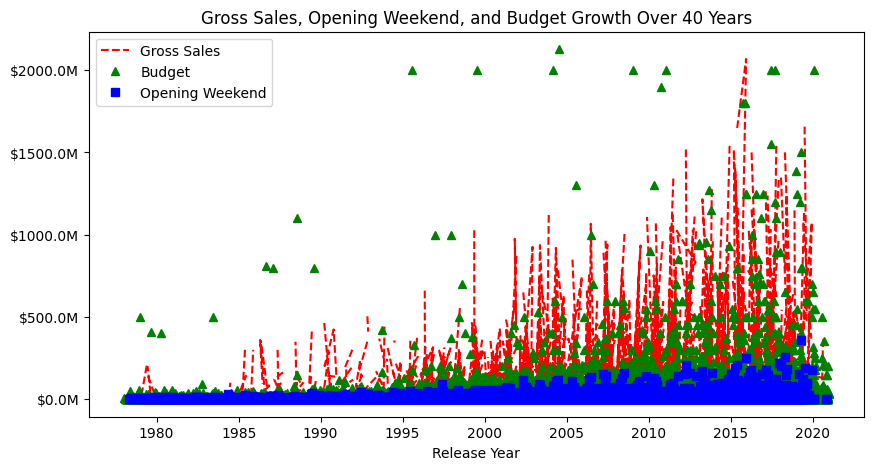

In [4]:
# import library to plot a boxplot for theruntime and budget plotted against the release date
# matplotlib is a package that allows us to plot data, and pyplot is a module within matplotlib that contains plotting functions
# seaborn is a package that allows us to plot data, and it is built on top of matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# create a figure and axis
fig, ax = plt.subplots()

# create a plot using red dashes for gross_sales, and blue squares for opening_weekend, and green triangles for budget
ax.plot(df['release_date'], df['gross_sales'], 'r--', df['release_date'], df['budget'], 'g^', df['release_date'], df['opening_weekend'], 'bs') 

# scale the gross_sales to be in millions
def millions(x, pos):
    return '$%1.1fM' % (x * 1e-6)

# set the y axis to be in millions
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

# set the x axis label
ax.set_xlabel('Release Year')

# set the plot title
ax.set_title('Gross Sales, Opening Weekend, and Budget Growth Over 40 Years')

# set the legend
ax.legend(['Gross Sales', 'Budget', 'Opening Weekend'])

# set the figure size
fig.set_size_inches(10, 5)

# show the plot
plt.show()

This graph shows the relationship between the gross sales, budget amount, and opening weekend amount. The data in this graph ranges from 1980 to 2020. Overall it gives a great general overview of the patterns over several decades. If this chart was presented to visualize a vague presentation of the patterns changing over a long period of time, then this chart may be helpful. If i wanted to see more specific numbers for each year, this may not be the best chart to access that information. There also appears to be some outliers

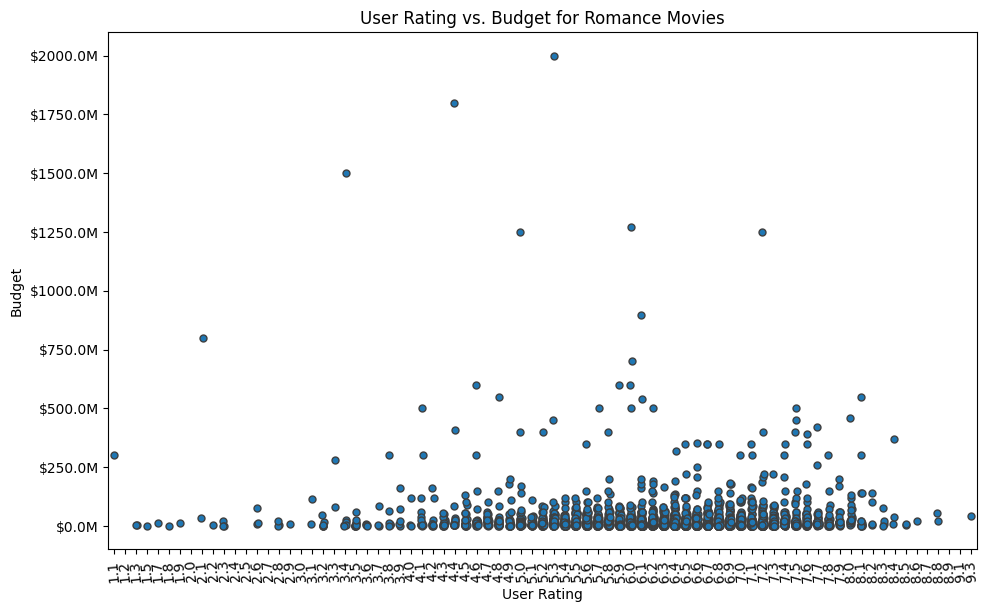

In [5]:
# import library to plot a boxplot for theruntime and budget plotted against the release date
# matplotlib is a package that allows us to plot data, and pyplot is a module within matplotlib that contains plotting functions
# seaborn is a package that allows us to plot data, and it is built on top of matplotlib
# matplotlib.ticker is a module within matplotlib that allows us to format the y-axis
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Query the view to find romance movies
cursor = database["IMDB_View_Pipeline"].find({"genres": "Romance"})
romance_df = pd.DataFrame(cursor)

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create a stripplot for the romance movies, with user rating on the x-axis and budget on the y-axis, line width means the width of the line, 
sns.stripplot(x='user_rating', y='budget', data=romance_df, jitter=True, linewidth=1)

# scale the y-axis to be in millions
def millions(x, pos):
    return '$%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)

# rotate the x-axis labels
plt.xticks(rotation=95)

# make some space between the plots for the x-axis labels
plt.tight_layout()

# Label the axes and title
plt.title('User Rating vs. Budget for Romance Movies')
plt.xlabel('User Rating')
plt.ylabel('Budget')

# Show the plot
plt.show()

This chart is actually quite boring and dull. Not much useful information can be obtained from it other then the wide variability of user ratings, and some odd looking outliers. For a vague understanding of user rating versus budget, for romance movies ever recorded on the metacrtic website, this chart can provide that visualization. However most of the budget plots are difficult to understand, so this would not be my first choice to represent this data. 

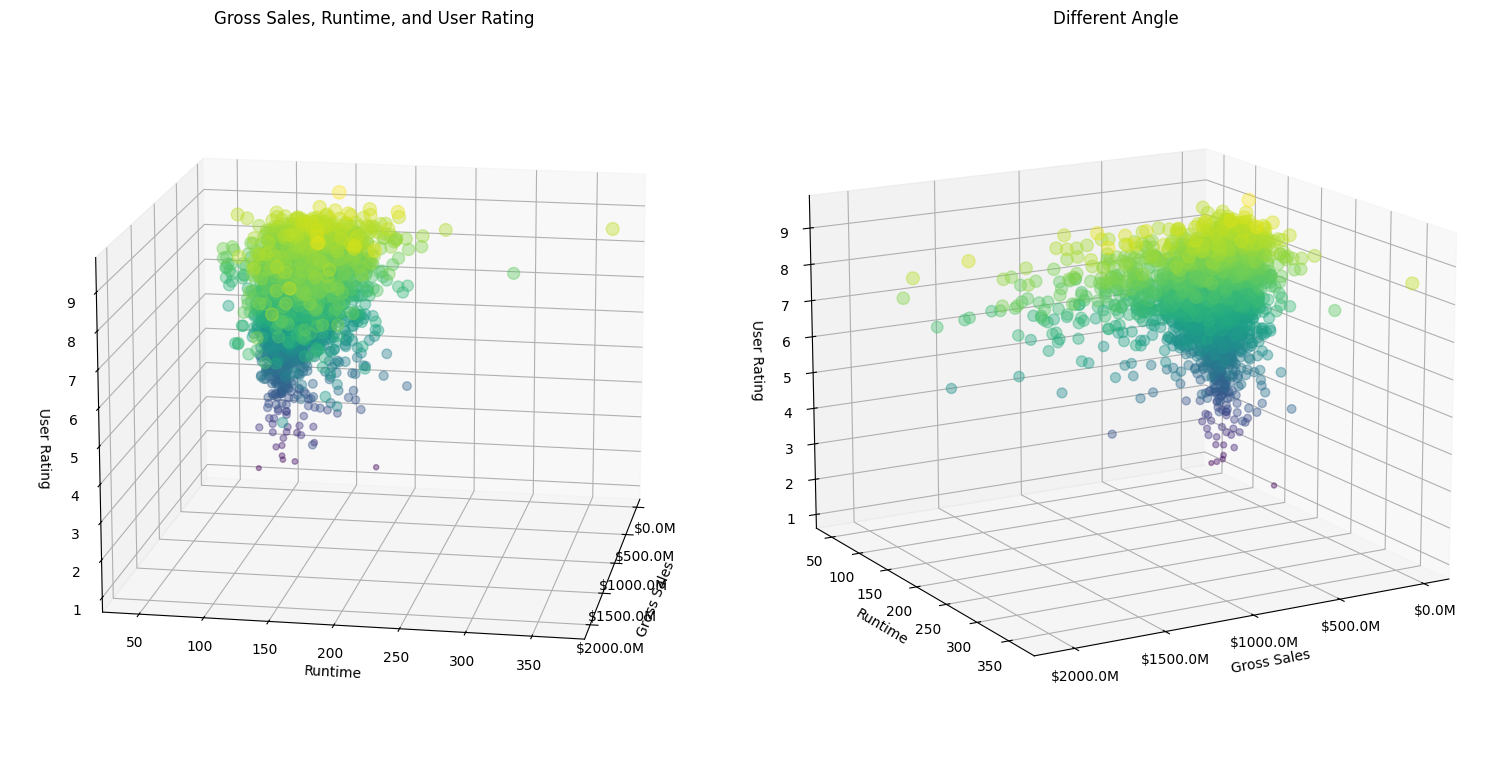

In [6]:
# Create a 3d chart showing Runtime and Budget plotted against release date.
from mpl_toolkits.mplot3d import Axes3D
import numpy as np  

# set up the figure and axes
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(121, projection='3d')

x = df['gross_sales']
y = df['runtime']
z = df['user_rating']

# give each point a color based on its value, and a size based on its value, and a transparency based on its value
scatter = ax1.scatter(x, y, z, c=z, s=z*10, alpha=0.4)

# convert the gross_sales to be in millions
def millions(x, pos):
    return '$%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
ax1.xaxis.set_major_formatter(formatter)

# set the title of the chart
ax1.set_title('Gross Sales, Runtime, and User Rating')
ax1.set_xlabel('Gross Sales')
ax1.set_ylabel('Runtime')
ax1.set_zlabel('User Rating')
ax1.view_init(azim=10, elev=15)

# show a different view of the chart
ax2 = fig.add_subplot(122, projection='3d')
scatter = ax2.scatter(x, y, z, c=z, s=z*10, alpha=0.4)
# combine both chart titles into one

ax2.set_title('Different Angle')
ax2.set_xlabel('Gross Sales')
ax2.set_ylabel('Runtime')
ax2.set_zlabel('User Rating')
ax2.view_init(azim=60, elev=15)

# convert the gross_sales to be in millions
def millions(x, pos):
    return '$%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
ax2.xaxis.set_major_formatter(formatter)

# create some padding around x labels so they don't get cut off
plt.tight_layout()

# show the plot
plt.show()

This 3d chart is awesome as its fun to see how 3 different kinds of data relate with one another. In this case gross sales, runtime and user rating is being compared against each other. Its clear to see a significant portion of the data falls in the $0-$500 million gross sales, and most of the data falls in the 50min to 200min range. There are some outliers hanging around. Like some 9 point user rating with 0.0M gross sales. It's possible that a highly rated movie didnt have a large fan base. Although this chart provides more specifics on the relationship between these numbers, it is still difficult to assess the gross sales, runtime and user rating. Finding more specific data plots is difficult, especially since there is such a huge blob of data. So as previousy stated for other charts, this chart can work on the visualization of the values. 

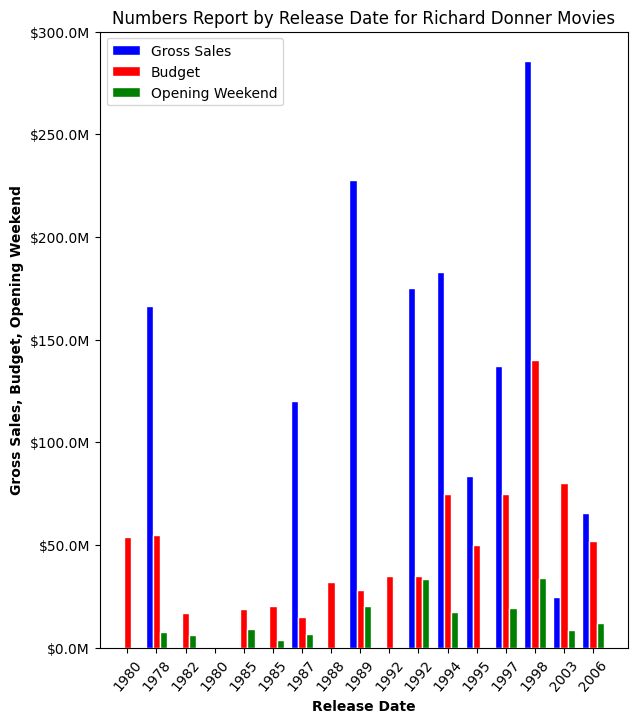

In [7]:
# Create a stacked bar chart showing the number of movies by genre and release year.
import matplotlib.pyplot as plt
import numpy as np

# set up the figure and axes
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(121)

cursor = database["IMDB_View_Pipeline"].find({"director": "Richard Donner"})
director_df = pd.DataFrame(cursor)

# set the column "release date" to year, so that we can group by year
director_df['release_date'] = pd.to_datetime(director_df['release_date']).dt.year

barWidth = 0.25
bars1 = director_df['gross_sales']
bars2 = director_df['budget']
bars3 = director_df['opening_weekend']
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

ax1.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='Gross Sales')
ax1.bar(r2, bars2, color='red', width=barWidth, edgecolor='white', label='Budget')
ax1.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='Opening Weekend')

# add xticks on the middle of the group bars
plt.xlabel('Release Date', fontweight='bold')
plt.ylabel('Gross Sales', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], director_df['release_date'])

# scale the gross_sales to show gross sales starting at -100M and ending at 500M
ax1.set_ylim([0, 300000000])

# convert the gross_sales to be in millions
def millions(x, pos):
    return '$%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
ax1.yaxis.set_major_formatter(formatter)

# set the legend
plt.legend()
# move the legend to the upper left corner
plt.legend(loc='upper left')

# set the figure size
fig.set_size_inches(15, 8)

# make the year more readable in the x axis
plt.xticks(rotation=50)

# set the title of the chart
ax1.set_title('Numbers Report by Release Date for Richard Donner Movies')

# set the x-axis label
ax1.set_xlabel('Release Date')
ax1.set_ylabel('Gross Sales, Budget, Opening Weekend')

# show the plot
plt.show()

This chart is visualizing far more precise data then the other 3 charts. Here we are looking at only the director Richard Donner's movies. We are comparing the gross sales, budget amount and opening weekend amount between the years 1978 and 2006. This is a great chart as it clearly shows the information needed to visualize the general numbers for each year of Richard Donner's career. 
Its interesting to see that Richard Donner probably hit the peak of his career in 1998 with his gross sales peaking towards 300M, it was also the year he had the biggest budget in his directing career, so this may have had something to do with the quality of the production of his films, resulting in higher gross sales. Finally although the grapgh cuts off in 2006, Richard Donner's gross sales plummets farther then ever in his career in the 2000's. Perhaps this was a pivotal moment in the movie industry, that created a plummet for him, or Richard Donner may have been creating less work, as he is nearing his retirement. So many observations and new questions can arise from observing this chart. 